<a href="https://colab.research.google.com/github/yanos84/Tutorials/blob/main/DNA_Gmo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# prompt: generate randomly data like this dna_sequences = [
#     "ATCGTAGCTAGT", "GCTAGCTAGCTA", "TGCATGCATGCA", "ATGCGTACGTAC",
#     "GTACGTACGTAC", "CTAGCTAGCTAG", "TGCATGCATGCA", "ATCGTAGCTAGT"
# ]

import random

def generate_dna_sequence(length=100):
    bases = ['A', 'T', 'C', 'G']
    sequence = ''.join(random.choice(bases) for _ in range(length))
    return sequence

dna_sequences = [generate_dna_sequence(100) for _ in range(20)]
dna_sequences


['TGGTGCCCGTCTAAACCCCCTCGGTTCGAGGCAAAGGGTTCTACCGTCTCAATGTGGTCCTATGTCCTCGATAAGCATGTGACGTTAGCATGCTACGACG',
 'CGGCTCGCAGACGGTGCAGGTATGTGAAATATGTAAGTAATATTTAGTGTGAAAGCTGTTCGAAAGAAATCCCACACGGCCTCCCATCTAGACTAGGAAG',
 'AGCCTGATGTGAACCCTATATATTACTCGGCGCCGCCATTTGATCAGTGATGAATATCCGAAAACGCAAGTACCAGAAGGGGTTCGGTTTCCTCAAAGAT',
 'CTCGAGTAATTGTTGGTCACTCTCCATCCCACCAGGACGGGCACCCGATGGCGGGGGTTTCAAATATAGAGCTGGAGGTCGTGACAAACAGTTCTACGGT',
 'GCGTGCTAATCACCAGTTTCAAGACCAATCTCTGAACACCTTGCAATGGACCTCTCGGAGTTCGCATGGCAGAACAGTGATCGATACGCCTATAGTCATA',
 'GCCTGCCGCGTGTTTCGCGCTGTAAGCACTACCCACTGGAGCAGACCGTCCGTCCTCGAAAGACGTTCGTAAAGGTCTAAAACCGGCTGTTAATCAGAAG',
 'TTGCCTACGTTGCACTCGCGTCTGAGTCAAACAGCTGCAGTCTAAAAAAGGTTACCACTTGTCGCCCCCACCGGAGCACGAACACTTATAAATGCACTCG',
 'TGTGACAATACCTGACCGCACAACTACCATAGGTTAGATTCTCTAGCCATTACGTCAAGGAACTGTGTTCGCATTGTTCGCGGTAATCCTGAATGTTCGT',
 'TACCACGTTGTGGTGGAAAGGCATTGGTGTATGCAATACGTCGGTCGCCGATGCGTAACCTTAGGCTGCATTACTAGACTTGTATAATGTGTTTATTCCA',
 'ATGGAGTCCAGCCCAGGGGGCAATGGAGTCTGACTGATACGCGGCTGATTGAA

In [14]:
# prompt: generate randomly (variable lenght) labels like this labels = ["Harmful", "Neutral", "Beneficial", "Neutral", "Harmful", "Beneficial", "Neutral", "Harmful"]

import random

labels = []
label_options = ["Harmful", "Neutral", "Beneficial"]
for _ in range(len(dna_sequences)):
  labels.append(random.choice(label_options))

labels


['Neutral',
 'Harmful',
 'Neutral',
 'Harmful',
 'Neutral',
 'Harmful',
 'Harmful',
 'Harmful',
 'Harmful',
 'Harmful',
 'Beneficial',
 'Beneficial',
 'Beneficial',
 'Neutral',
 'Neutral',
 'Beneficial',
 'Neutral',
 'Neutral',
 'Neutral',
 'Beneficial']

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.2508 - loss: 1.1000 - val_accuracy: 0.5000 - val_loss: 1.0989
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4115 - loss: 1.0771 - val_accuracy: 0.5000 - val_loss: 1.0932
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6103 - loss: 1.0724 - val_accuracy: 0.7500 - val_loss: 1.0924
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8110 - loss: 1.0568 - val_accuracy: 0.7500 - val_loss: 1.0925
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9689 - loss: 1.0111 - val_accuracy: 0.7500 - val_loss: 1.0858
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8976 - loss: 0.9921 - val_accuracy: 0.5000 - val_loss: 1.0870
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9689 - loss: 0.9300 - val_accuracy: 0.7500 - val_loss: 1.0882
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8421 - loss: 0.8678 - val_accuracy: 0.7500 - val_loss: 1.0847
Epoch 9/10


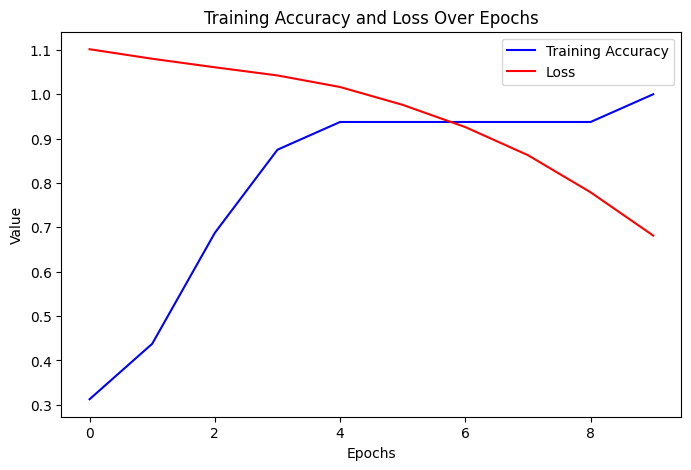

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.2500 - loss: 1.1174
Test Accuracy: 25.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted Effect: Neutral


In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

"""# Example DNA sequences (replace with real data)
dna_sequences = [
    "ATCGTAGCTAGT", "GCTAGCTAGCTA", "TGCATGCATGCA", "ATGCGTACGTAC",
    "GTACGTACGTAC", "CTAGCTAGCTAG", "TGCATGCATGCA", "ATCGTAGCTAGT"
]"""
# Corresponding labels: 0 = Harmful, 1 = Neutral, 2 = Beneficial
#labels = ["Harmful", "Neutral", "Beneficial", "Neutral", "Harmful", "Beneficial", "Neutral", "Harmful"]

# Encode labels correctly
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)  # Converts to [0, 1, 2] (no -1 values)

# Tokenize DNA sequences (Convert ATCG to numeric representation)
tokenizer = Tokenizer(char_level=True)  # Treats each letter (A, T, C, G) as a token
tokenizer.fit_on_texts(dna_sequences)
sequences = tokenizer.texts_to_sequences(dna_sequences)

# Pad sequences to make them of equal length
max_length = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_length, padding='post')
y = np.array(labels)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple neural network for DNA effect prediction
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=8, input_length=max_length),
    Flatten(),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: Harmful, Neutral, Beneficial
])

# Compile the model (Use sparse_categorical_crossentropy for integer labels)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=2, validation_data=(X_test, y_test))

# Plot training accuracy and loss in one graph
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='b')
plt.plot(history.history['loss'], label='Loss', color='r')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.title('Training Accuracy and Loss Over Epochs')
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Example prediction (Modify a DNA sequence)
sample_dna = ["ATGCGTACGTAC"]  # Example DNA modification
sample_seq = tokenizer.texts_to_sequences(sample_dna)
sample_seq = pad_sequences(sample_seq, maxlen=max_length, padding='post')

# Predict class
predicted_class = np.argmax(model.predict(sample_seq), axis=-1)[0]
print(f"Predicted Effect: {label_encoder.classes_[predicted_class]}")
